In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import (accuracy_score, precision_score, recall_score, balanced_accuracy_score,
                             confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)


In [ ]:
dataset = pd.read_csv('/content/dataset.csv')

In [ ]:
dataset.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118.0,68.0,22.73,0.0,Caucasian,M,180.3,Floor,92.0,admit,CTICU,0.541667,73.9,113.0,502.01,0.0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0.0
1,114252,59342,81.0,77.0,27.42,0.0,Caucasian,F,160.0,Floor,90.0,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0.0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0.0
2,119783,50777,118.0,25.0,31.95,0.0,Caucasian,F,172.7,Accident & Emergency,93.0,admit,Med-Surg ICU,0.000694,95.3,122.0,703.03,0.0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0.0
3,79267,46918,118.0,81.0,22.64,1.0,Caucasian,F,165.1,Operating Room / Recovery,92.0,admit,CTICU,0.000694,61.7,203.0,1206.03,1.0,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0.0
4,92056,34377,33.0,19.0,NaN,0.0,Caucasian,M,188.0,Accident & Emergency,91.0,admit,Med-Surg ICU,0.073611,NaN,119.0,601.01,0.0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0.0


In [ ]:
dataset.isnull().sum()

encounter_id                         0
patient_id                           0
hospital_id                          1
age                               3989
bmi                               3328
elective_surgery                     1
ethnicity                         1383
gender                              25
height                            1274
icu_admit_source                   110
icu_id                               1
icu_stay_type                        1
icu_type                             1
pre_icu_los_days                     1
weight                            2666
apache_2_diagnosis                1532
apache_3j_diagnosis                997
apache_post_operative                1
arf_apache                         661
gcs_eyes_apache                   1826
gcs_motor_apache                  1826
gcs_unable_apache                  964
gcs_verbal_apache                 1826
heart_rate_apache                  815
intubated_apache                   661
map_apache               

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset['apache_3j_bodysystem'].unique()

array(['Sepsis', 'Respiratory', 'Metabolic', 'Cardiovascular', 'Trauma',
       'Neurological', 'Gastrointestinal', 'Genitourinary', nan,
       'Hematological', 'Musculoskeletal/Skin', 'Gynecological'],
      dtype=object)

In [ ]:
dataset['apache_3j_bodysystem'].value_counts()

apache_3j_bodysystem
Cardiovascular          28197
Neurological            11324
Sepsis                  10837
Respiratory             10818
Gastrointestinal         8398
Metabolic                7008
Trauma                   3542
Genitourinary            2027
Musculoskeletal/Skin     1103
Hematological             596
Gynecological             308
Name: count, dtype: int64

In [ ]:
dataset = dataset.drop('Unnamed: 83', axis=1)

In [ ]:
dataset

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118.0,68.0,22.730000,0.0,Caucasian,M,180.3,Floor,92.0,admit,CTICU,0.541667,73.9,113.0,502.01,0.0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0.0
1,114252,59342,81.0,77.0,27.420000,0.0,Caucasian,F,160.0,Floor,90.0,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0.0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0.0
2,119783,50777,118.0,25.0,31.950000,0.0,Caucasian,F,172.7,Accident & Emergency,93.0,admit,Med-Surg ICU,0.000694,95.3,122.0,703.03,0.0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0.0
3,79267,46918,118.0,81.0,22.640000,1.0,Caucasian,F,165.1,Operating Room / Recovery,92.0,admit,CTICU,0.000694,61.7,203.0,1206.03,1.0,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0.0
4,92056,34377,33.0,19.0,NaN,0.0,Caucasian,M,188.0,Accident & Emergency,91.0,admit,Med-Surg ICU,0.073611,NaN,119.0,601.01,0.0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85685,23048,1700,2.0,67.0,67.711508,0.0,Afric

In [ ]:
dataset.isnull().sum()

encounter_id                        0
patient_id                          0
hospital_id                         1
age                              3989
bmi                              3328
elective_surgery                    1
ethnicity                        1383
gender                             25
height                           1274
icu_admit_source                  110
icu_id                              1
icu_stay_type                       1
icu_type                            1
pre_icu_los_days                    1
weight                           2666
apache_2_diagnosis               1532
apache_3j_diagnosis               997
apache_post_operative               1
arf_apache                        661
gcs_eyes_apache                  1826
gcs_motor_apache                 1826
gcs_unable_apache                 964
gcs_verbal_apache                1826
heart_rate_apache                 815
intubated_apache                  661
map_apache                        914
resprate_apa

In [ ]:
dataset['hospital_death'] = dataset['hospital_death'].fillna(0)
dataset['hospital_death'] = dataset['hospital_death'].astype(int)

In [ ]:
for col in dataset.select_dtypes('number'):
  dataset[col] = dataset[col].fillna(dataset[col].mean())

In [ ]:
for col in dataset.select_dtypes('object'):
  le = LabelEncoder()
  dataset[col] = le.fit_transform(dataset[col])

In [ ]:
dataset.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118.0,68.0,22.730000,0.0,2,1,180.3,1,92.0,0,2,0.541667,73.900000,113.0,502.01,0.0,0.0,3.000000,6.000000,0.000000,4.000000,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.000000,63.000000,119.0,108.0,86.0,85.0,86.000000,85.000000,26.000000,18.000000,100.0,74.0,131.0,115.0,131.000000,115.000000,168.000000,109.000000,4.000000,3.40000,0.100000,0.050000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0,0
1,114252,59342,81.0,77.0,27.420000,0.0,2,0,160.0,1,90.0,0,5,0.927778,70.200000,108.0,203.01,0.0,0.0,1.000000,3.000000,0.000000,1.000000,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.000000,48.000000,114.0,100.0,85.0,57.0,85.000000,57.000000,31.000000,28.000000,95.0,70.0,95.0,71.0,95.000000,71.000000,145.000000,128.000000,4.200000,3.80000,0.470000,0.290000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6,0
2,119783,50777,118.0,25.0,31.950000,0.0,2,0,172.7,0,93.0,0,5,0.000694,95.300000,122.0,703.03,0.0,0.0,3.000000,6.000000,0.000000,5.000000,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.000000,58.000000,96.0,78.0,91.0,83.0,91.000000,83.000000,20.000000,16.000000,98.0,91.0,148.0,124.0,148.000000,124.000000,174.447261,114.537914,4.252606,3.93724,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3,0
3,79267,46918,118.0,81.0,22.640000,1.0,2,0,165.1,2,92.0,0,2,0.000694,61.700000,203.0,1206.03,1.0,0.0,4.000000,6.000000,0.000000,5.000000,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,75.809567,63.476221,100.0,96.0,92.0,71.0,91.520669,79.964355,12.000000,11.000000,100.0,99.0,136.0,106.0,133.135858,116.885785,185.000000,88.000000,5.000000,3.50000,0.040000,0.030000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,92056,34377,33.0,19.0,29.175047,0.0,2,1,188.0,0,91.0,0,5,0.073611,83.929738,119.0,601.01,0.0,0.0,3.466159,5.474304,0.010174,3.996077,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.000000,68.000000,89.0,76.0,104.0,92.0,104.000000,92.000000,22.559443,17.285273,100.0,100.0,130.0,120.0,130.000000,120.000000,174.447261,114.537914,4.252606,3.93724,0.087331,0.044307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,7,0


In [ ]:
dataset['hospital_death'].value_counts()

hospital_death
0    78186
1     7504
Name: count, dtype: int64

In [ ]:
X = dataset.drop('hospital_death', axis=1).values
y = dataset['hospital_death'].values

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [ ]:
#USING MULTI LINEAR REGRESSION
model=LogisticRegression(max_iter = 10000)
model.fit(xtrain,ytrain)
predicted=model.predict(xtest)
print("accuracy_score", accuracy_score(ytest,predicted))
# print("R squared", metrics.r2_score(ytest,predicted))

accuracy_score 0.920365961816739


In [ ]:
unique_values = np.unique(predicted)
counts = np.bincount(predicted)

print("Unique Values:", unique_values)
print("Counts:", counts[unique_values])

Unique Values: [0 1]
Counts: [20821   602]


In [ ]:
confusion_matrix = confusion_matrix(ytest, predicted)

confusion_matrix

array([[19347,   232],
       [ 1474,   370]])

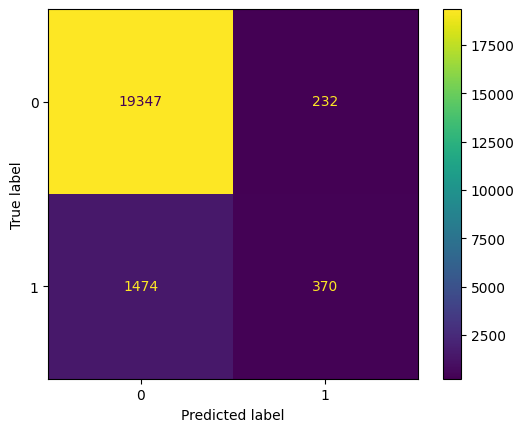

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0', '1'])
cm_display.plot()
plt.show()